# Balance Point Plots

## Description

Balance point plots are widely used and typically represent and energy signature of a household. On the x-axis is outdoor temperature and on the y-axis is energy demand. In our case, we do not have energy demand so the heating duty cycle is used as a proxy. As observed in the plot, as the outdoor temperature drops, more energy is required for heating. Each point in the plot represents a mean daily value, and the mean is taken only over night time hours.

A linear regression can be performed on the balance point plot to obtain an estimate for RK, where R is thermal resistivity and K is the power of the heating system. The physical equation that describes the line of best fit is:

$$
y = \frac{1}{RK}(T_{in} - x)
$$


The slope of the line is therefore:

$$
-\frac{1}{RK}
$$

More information about how this equation was derived can be found at [TODO reference paper].

## Example

Run this code to see a the results of the linear regression for a blance point plot for a particular building. In the final plot, the orange dots represent all the points that were used for the regression and the blue points represent outliers.

### 1. Import the required libraries

In [1]:
import matplotlib.pyplot as plt
from scipy import stats

from scripts.filters import months, hours
import scripts.balance_point as bp
import scripts.preprocessing as pp

### 2. Load the building data into memory

Edit the filename to chang which building is being evaluated. The example buildings included in this repo can be found  in `data/raw_data/Toronto`.

In [2]:
filename = "001014855d9a10060d20420b8a6c6a015322c790.csv"
df = pp.load_building_data(filename)
limited_df = pp.limit_time_ranges(months, hours, df)

### 3. Run the model Fitting

In [3]:
line = bp.find_slope(limited_df, reject_outliers = True)

resampled = bp.resample_data(limited_df)
df_xy = resampled[['T_out', 'auxHeat1']]
x_orig = df_xy['T_out']
y_orig = df_xy['auxHeat1']

slope, intercept, r_value, p_value, std_err = line

filtered_df = bp.reject_outliers_balance_point(df_xy)
x_filtered = filtered_df["T_out"]
y_filtered = filtered_df["auxHeat1"]

### 4. Plot the results

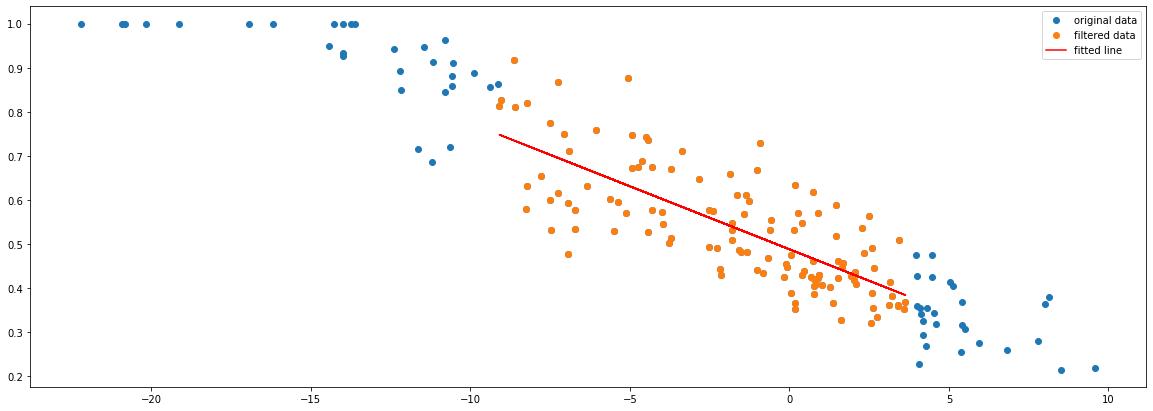

In [4]:
plt.figure(figsize=(20,7))
plt.plot(x_orig, y_orig, 'o', label='original data')
plt.plot(x_filtered, y_filtered, 'o', label = "filtered data")
plt.plot(x_filtered, intercept + slope*x_filtered, 'r', label='fitted line')
plt.legend()
plt.show()